Automatically created module for IPython interactive environment


/home/tjmoutinho/.virtualenvs/lactobacillus/lib/python3.5/site-packages/ipykernel_launcher.py:60 RuntimeWarning: divide by zero encountered in true_divide


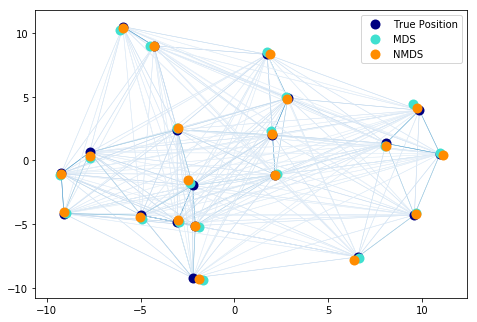

In [4]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()

In [5]:
X_true

array([[ 2.85081335,  4.90742939],
       [ 1.74752916,  8.34003249],
       [ 9.59326902, -4.28709569],
       [ 2.17175612, -1.13731058],
       [ 2.03034713,  2.02180378],
       [-9.22933735, -1.01456007],
       [-3.04318839, -4.85273165],
       [ 9.85742852,  3.95488343],
       [-4.29721081,  9.01908971],
       [10.96071272,  0.52228034],
       [-2.08131319, -5.12622038],
       [-7.72048467,  0.63570161],
       [-2.22272217, -1.96710603],
       [-9.08792836, -4.17367442],
       [ 8.0750871 ,  1.34274655],
       [ 6.57556366, -7.58761903],
       [-5.94747248, 10.52794239],
       [-2.21339293, -9.24720994],
       [-3.05251763,  2.42737227],
       [-4.9669388 , -4.30575417]])

In [2]:
import cobra
import glob

In [4]:
model_paths = glob.glob('../models/*.xml')
genome_ids = [x.replace("../models/","").replace(".xml","") for x in model_paths]
print(len(genome_ids))
print(len(set(genome_ids)))
genome_ids

1507
1507


['1001583.3',
 '1002365.5',
 '1007676.4',
 '1028490.4',
 '1029822.3',
 '1033837.3',
 '1033983.3',
 '1036177.3',
 '1037411.3',
 '1040964.3',
 '1041521.3',
 '1042399.3',
 '1042400.3',
 '1046596.4',
 '1046596.6',
 '1046599.3',
 '1050107.3',
 '1050107.4',
 '1051650.4',
 '1051650.8',
 '1051651.3',
 '1051652.3',
 '1051653.3',
 '1051653.4',
 '1051654.3',
 '1051655.5',
 '1051656.3',
 '1051657.3',
 '1051658.3',
 '1051659.3',
 '1051660.3',
 '1051661.3',
 '1051661.4',
 '1069534.5',
 '1071400.3',
 '1074451.3',
 '1074467.3',
 '1078018.5',
 '1088720.3',
 '109790.30',
 '109790.33',
 '1108963.3',
 '1114972.3',
 '1114972.5',
 '1114972.6',
 '1122146.3',
 '1122146.4',
 '1122147.3',
 '1122147.4',
 '1122148.5',
 '1122148.6',
 '1122148.7',
 '1122149.3',
 '1122150.3',
 '1122151.3',
 '1122151.5',
 '1122152.3',
 '1122152.4',
 '1122153.4',
 '1122153.5',
 '1130798.3',
 '1130798.5',
 '1133569.3',
 '1133569.4',
 '1133851.3',
 '1136177.4',
 '1138822.4',
 '1144300.3',
 '115541.4',
 '1185324.3',
 '1185325.3',
 '11930

In [13]:
model_paths = glob.glob('../models/*.xml')
genome_ids = [x.replace("../models/","").replace(".xml","") for x in model_paths]
models = []
for genome_id in genome_ids:
    model = cobra.io.read_sbml_model('../gap_models/'+genome_id+'.xml')
    models.append(model)

makeShared(models, '../Data/rxn_file.tsv', '../Data/cpd_file.tsv', '../Data/exch_file.tsv')

In [6]:
def makeShared(models, rxn_file, cpd_file, exch_file):
    
    rxns = set()
    cpds = set()
    exchs = set()
    
    for index in models:
        rxns |= set([x.id for x in index.reactions])
        cpds |= set([x.id for x in index.metabolites])
        exchs |= set([x.id for x in index.exchanges])
    
    rxns = list(rxns)
    cpds = list(cpds)
    exchs = list(exchs)
    
    rxn_file = open(rxn_file, 'w')
    header = 'model\t' + '\t'.join(rxns) + '\n'
    rxn_file.write(header)
    
    cpd_file = open(cpd_file, 'w')
    header = 'model\t' + '\t'.join(cpds) + '\n'
    cpd_file.write(header)
    
    exch_file = open(exch_file, 'w')
    header = 'model\t' + '\t'.join(exchs) + '\n'
    exch_file.write(header)
    
    for index in models:
        rxn_file.write(str(index) + '\t')
        cpd_file.write(str(index) + '\t')
        exch_file.write(str(index) + '\t')
        
        curr_rxn = set([x.id for x in index.reactions])
        curr_cpd = set([x.id for x in index.metabolites])
        curr_ex = set([x.id for x in index.exchanges])
        
        for x in rxns:
            if x in x in curr_rxn:
                rxn_file.write('1')
            else:
                rxn_file.write('0')
            if x != rxns[-1]:
                rxn_file.write('\t')
        rxn_file.write('\n')
        
        for y in cpds:
            if y in y in curr_cpd:
                cpd_file.write('1')
            else:
                cpd_file.write('0')
            if y != cpds[-1]:
                cpd_file.write('\t')
        cpd_file.write('\n')   
            
        for z in exchs:
            if z in z in curr_ex:
                exch_file.write('1')
            else:
                exch_file.write('0')
            if z != exchs[-1]:
                exch_file.write('\t')
        exch_file.write('\n') 
    
    rxn_file.close()
    cpd_file.close()
    exch_file.close()